<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
import gc
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Loading  Dataset </h1>  
     
</div>

In [48]:
df_sub=pd.read_csv("../sample_submission.csv")
df_train=pd.read_csv("../train.csv")
df_test=pd.read_csv("../test.csv")

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Check on Data </h1>  
     
</div>

In [49]:
df_extra = pd.read_csv('../Fertilizer Prediction.csv')

In [50]:
df_extra.columns,df_train.columns

(Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
        'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
       dtype='object'),
 Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
        'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
       dtype='object'))

In [51]:
df_train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [52]:
df_test.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [53]:
df_test.shape,df_train.shape

((250000, 9), (750000, 10))

In [54]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [55]:
df_train = pd.concat([df_train, df_extra], ignore_index=True)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Checking - Distribution of categorical features </h1>  
     
</div>

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850000 entries, 0 to 849999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      850000 non-null  int64 
 1   Humidity         850000 non-null  int64 
 2   Moisture         850000 non-null  int64 
 3   Soil Type        850000 non-null  object
 4   Crop Type        850000 non-null  object
 5   Nitrogen         850000 non-null  int64 
 6   Potassium        850000 non-null  int64 
 7   Phosphorous      850000 non-null  int64 
 8   Fertilizer Name  850000 non-null  object
dtypes: int64(6), object(3)
memory usage: 58.4+ MB


In [57]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

Soil Type: 5 unique values
Crop Type: 11 unique values
Fertilizer Name: 7 unique values


37336

In [58]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
unique_values = {col: df_test[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

Soil Type: 5 unique values
Crop Type: 11 unique values


3341

In [59]:
df_test.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')

In [60]:
df_train.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Exploratory Data Analysis (EDA) </h1>  
     
</div>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# 1. Veri genel bakış
print(df_train.head())
print(df_train.info())
print(df_train.describe())

   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           37        70        36    Clayey  Sugarcane        36          4   
1           27        69        65     Sandy    Millets        30          6   
2           29        63        32     Sandy    Millets        24         12   
3           35        62        54     Sandy     Barley        39         12   
4           35        58        43       Red      Paddy        37          2   

   Phosphorous Fertilizer Name  
0            5           28-28  
1           18           28-28  
2           16        17-17-17  
3            4        10-26-26  
4           16             DAP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850000 entries, 0 to 849999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      850000 non-null  int64 
 1   Humidity         850000 non-null  int64 
 2   Moisture         85000

In [63]:
# 2. Eksik değer kontrolü
print(df_train.isnull().sum())

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


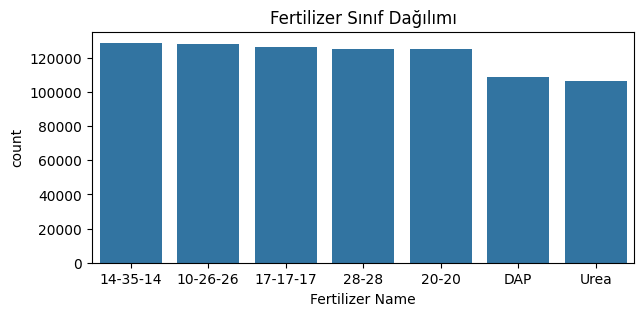

Fertilizer Name
14-35-14    0.151680
10-26-26    0.150900
17-17-17    0.148971
28-28       0.147518
20-20       0.147141
DAP         0.128329
Urea        0.125461
Name: proportion, dtype: float64


In [64]:
# 3. Sınıf dağılımı (hedef değişkenin dengesi)
plt.figure(figsize=(7, 3))
sns.countplot(x='Fertilizer Name', data=df_train, order=df_train['Fertilizer Name'].value_counts().index)
plt.title('Fertilizer Sınıf Dağılımı')
plt.show()
print(df_train['Fertilizer Name'].value_counts(normalize=True))

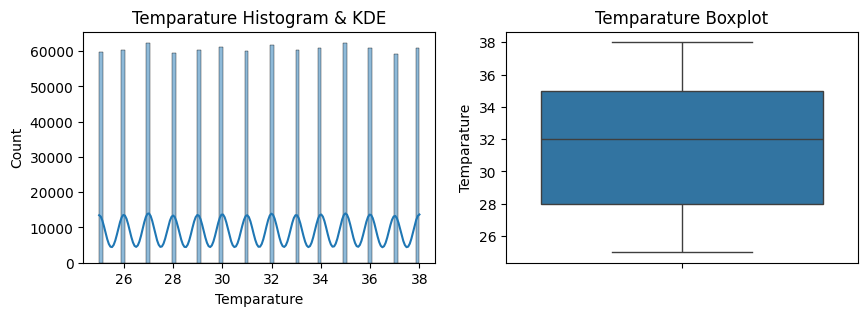

Temparature çarpıklık: -0.0020288949448421453 | Eksik: 0


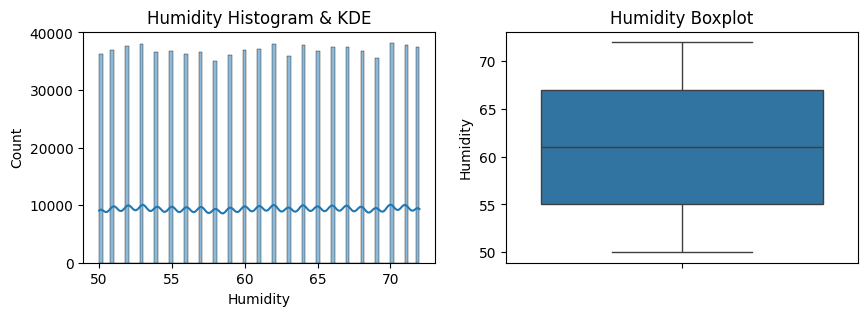

Humidity çarpıklık: -0.006797444562017955 | Eksik: 0


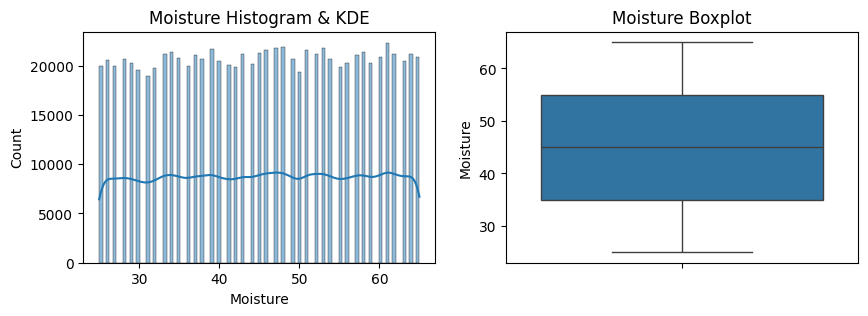

Moisture çarpıklık: -0.0159620429419402 | Eksik: 0


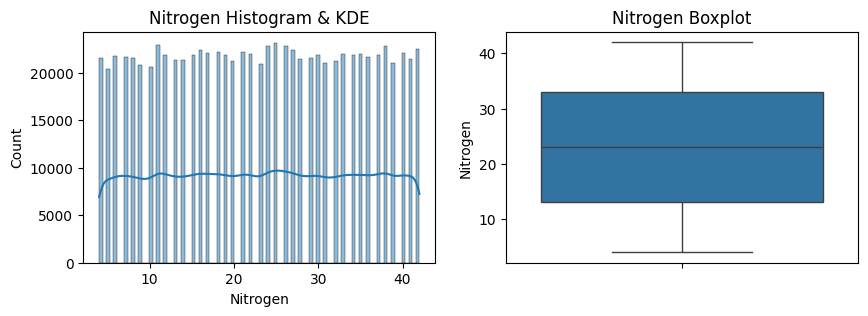

Nitrogen çarpıklık: -0.0050911378200680524 | Eksik: 0


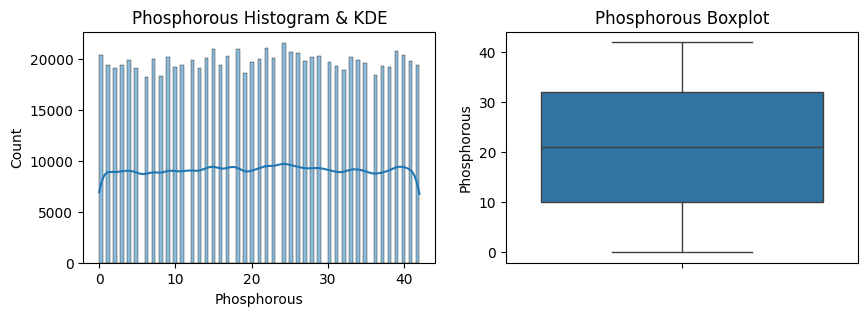

Phosphorous çarpıklık: -0.008811686101291162 | Eksik: 0


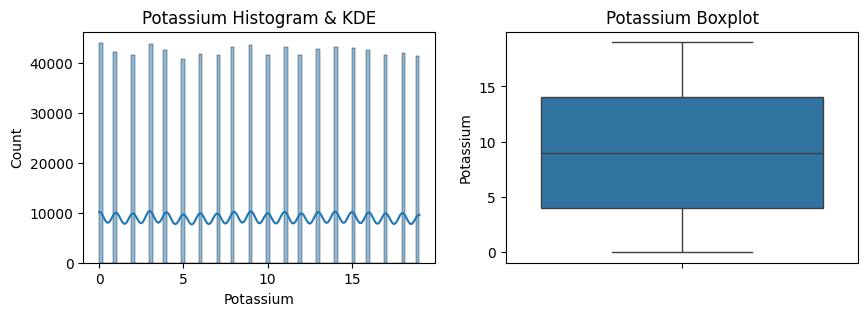

Potassium çarpıklık: -0.0030140279095474012 | Eksik: 0


In [65]:
# 4. Sayısal özelliklerin dağılımları (histogram + KDE + boxplot)
num_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium']
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df_train[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Histogram & KDE')
    sns.boxplot(y=df_train[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    plt.show()
    print(f'{col} çarpıklık:', df_train[col].skew(), '| Eksik:', df_train[col].isnull().sum())

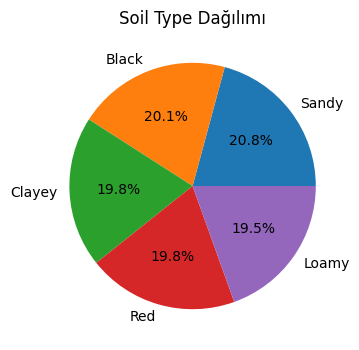

Soil Type
Sandy     176774
Black     171056
Clayey    168302
Red       168019
Loamy     165849
Name: count, dtype: int64


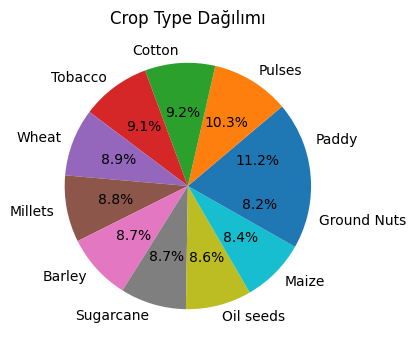

Crop Type
Paddy          94857
Pulses         87252
Cotton         78408
Tobacco        77224
Wheat          75540
Millets        74445
Barley         74086
Sugarcane      73536
Oil seeds      73280
Maize          71582
Ground Nuts    69790
Name: count, dtype: int64


In [66]:
# 5. Kategorik özelliklerin dağılımları (pie chart)
cat_cols = ['Soil Type', 'Crop Type']
for col in cat_cols:
    plt.figure(figsize=(4, 4))
    df_train[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'{col} Dağılımı')
    plt.ylabel('')
    plt.show()
    print(df_train[col].value_counts())

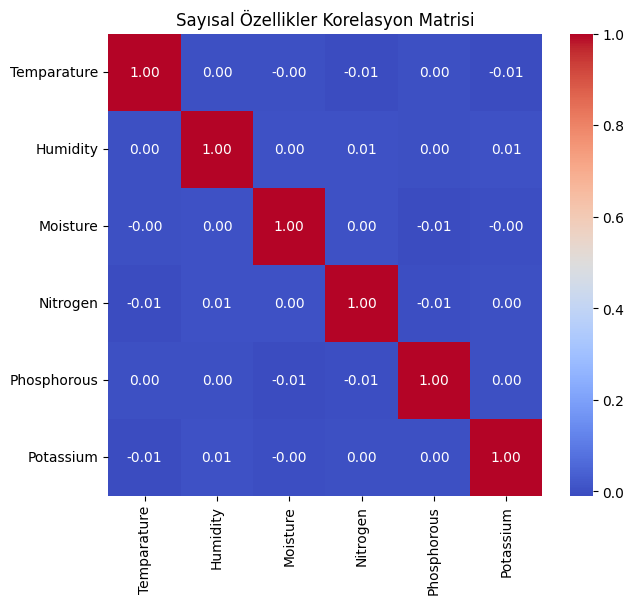

In [67]:
# 6. Korelasyon matrisi ve heatmap
plt.figure(figsize=(7, 6))
corr = df_train[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sayısal Özellikler Korelasyon Matrisi')
plt.show()

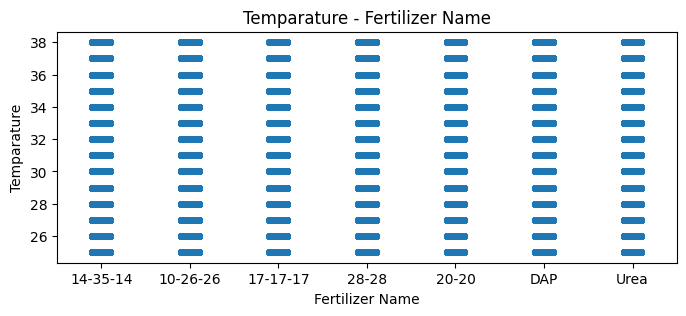

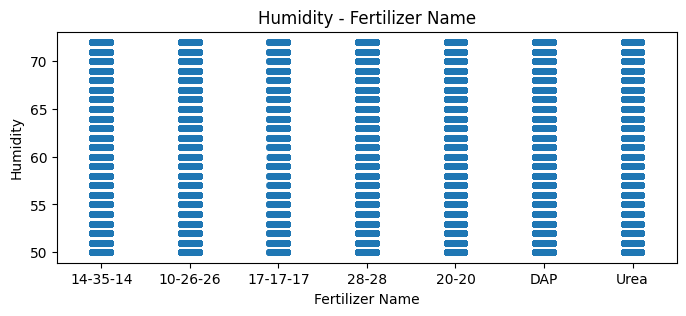

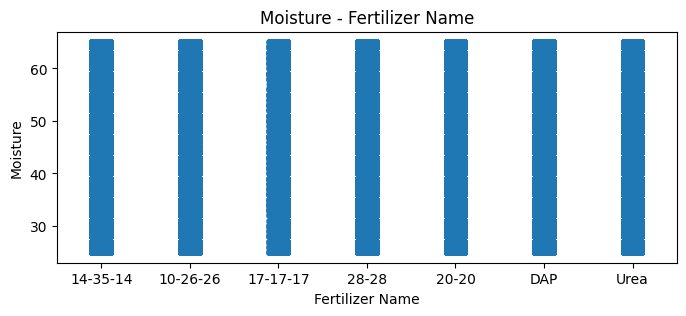

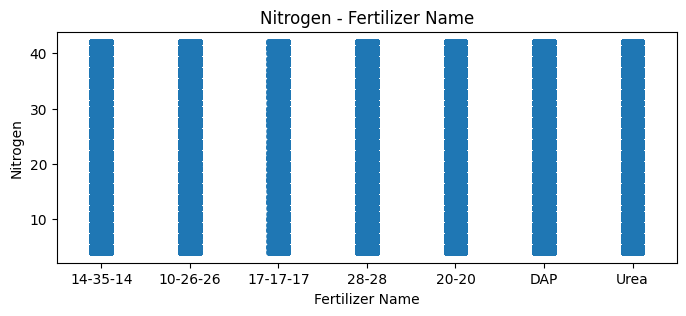

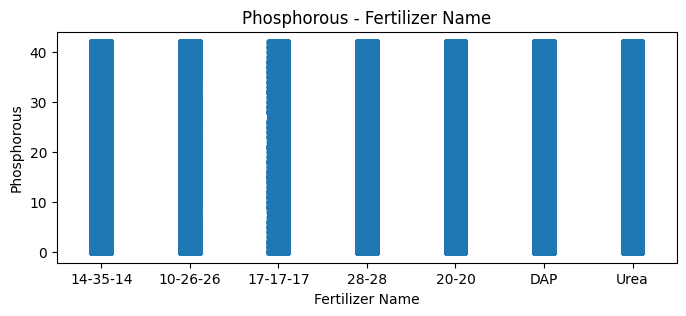

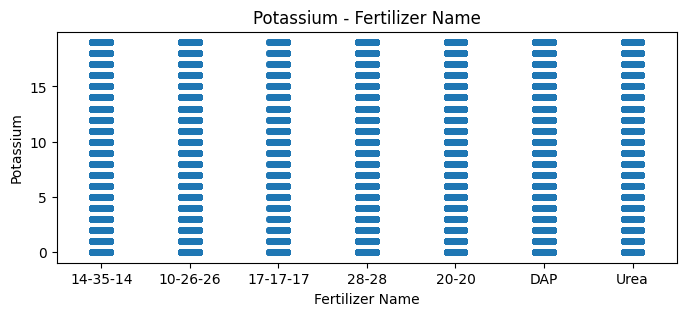

In [68]:
# 7. Özellikler ve hedef arasındaki ilişkiler (strip plot)
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.stripplot(x='Fertilizer Name', y=col, data=df_train, order=df_train['Fertilizer Name'].value_counts().index, alpha=0.5)
    plt.title(f'{col} - Fertilizer Name')
    plt.show()

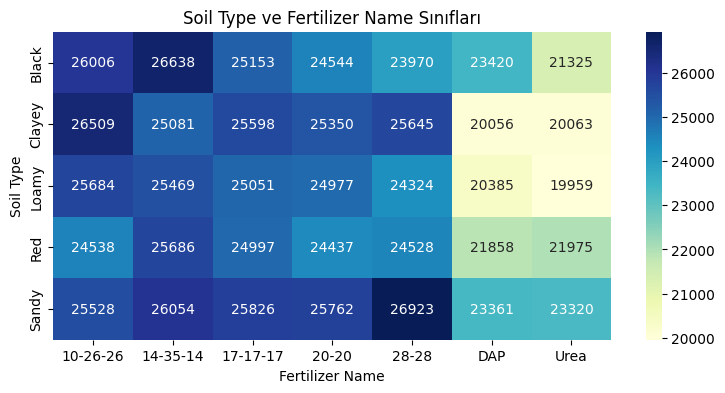

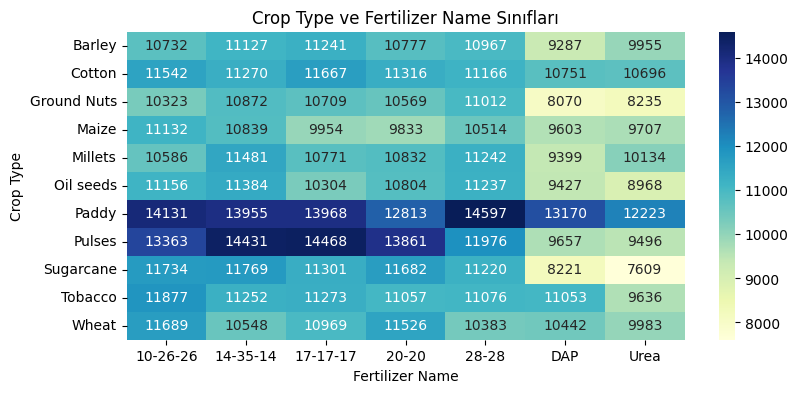

In [69]:
# 8. Crosstab + heatmap (Soil Type ve Crop Type için Fertilizer dağılımları)
for cat in cat_cols:
    ct = pd.crosstab(df_train[cat], df_train['Fertilizer Name'])
    plt.figure(figsize=(9, 4))
    sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'{cat} ve Fertilizer Name Sınıfları')
    plt.ylabel(cat)
    plt.xlabel('Fertilizer Name')
    plt.show()

In [70]:
y = df_train['Fertilizer Name'] 
X = df_train.drop(['Fertilizer Name'],axis=1)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Model Building - Training - Classification </h1>  
     
</div>

In [71]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =42,stratify=y)

In [72]:
params = {
        'objective': 'multi:softprob',  
        'num_class': len(np.unique(y)), 
        'max_depth': 7,
        'learning_rate': 0.03,
        'subsample': 0.8,
        'max_bin': 128,
        'colsample_bytree': 0.3, 
        'colsample_bylevel': 1,  
        'colsample_bynode': 1,  
        'tree_method': 'hist',  
        'random_state': 42,
        'eval_metric': 'mlogloss',
        'device': "cuda",
        'enable_categorical':True,
        'n_estimators':10000,
        'early_stopping_rounds':50,
    }

In [77]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns using LabelEncoder
for col in ['Soil Type', 'Crop Type']:
    le_col = LabelEncoder()
    train_X[col] = le_col.fit_transform(train_X[col])
    test_X[col] = le_col.transform(test_X[col])

le = LabelEncoder()
train_y_enc = le.fit_transform(train_y)
test_y_enc = le.transform(test_y)

model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(train_y_enc)),
    n_estimators=3200,
    learning_rate=0.045,         
    max_depth=7,                
    colsample_bytree=0.6,       
    colsample_bylevel=0.8,      
    subsample=0.8
)
model.fit(train_X, train_y_enc)
y_pred_probs = model.predict_proba(test_X)
top_3_preds = np.argsort(y_pred_probs, axis=1)[:, -3:][:, ::-1]  
actual = [[label] for label in test_y_enc]

def mapk(actual, predicted, k=3):
    def apk(a, p, k):
        p = p[:k]
        score = 0.0
        hits = 0
        seen = set()
        for i, pred in enumerate(p):
            if pred in a and pred not in seen:
                hits += 1
                score += hits / (i + 1.0)
                seen.add(pred)
        return score / min(len(a), k)
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])
map3_score = mapk(actual, top_3_preds)
print(f"✅ MAP@3 Score: {map3_score:.5f}")

✅ MAP@3 Score: 0.35677


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Classification Analysis </h1>  
     
</div>

In [78]:
import lime
import lime.lime_tabular

In [79]:
redict_fn_xgb = lambda x: model.predict_proba(x).astype(float)
X = train_X.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = train_X.columns,kernel_width=5)

In [80]:
df_test.head(4)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,Sandy,Wheat,34,11,24
1,27,62,45,Red,Sugarcane,30,14,15
2,28,72,28,Clayey,Ground Nuts,14,15,4
3,37,53,57,Black,Ground Nuts,18,17,36


In [81]:
df_test.loc[[3]]

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
3,37,53,57,Black,Ground Nuts,18,17,36


In [82]:
test_X

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
200654,29,64,60,4,3,39,4,28
192348,36,71,28,3,4,20,8,12
342924,29,63,46,3,8,40,11,13
612367,27,53,34,3,9,5,10,30
75674,32,68,46,1,10,10,16,18
...,...,...,...,...,...,...,...,...
455283,35,72,33,3,0,38,4,21
479677,38,62,51,0,10,11,11,35
834802,38,53,57,0,10,26,18,17
210310,32,53,63,3,2,37,12,3


In [87]:
choosen_instance = test_X.loc[[15066]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_xgb, num_features=15)
exp.show_in_notebook(show_all=False)

ImportError: cannot import name 'display' from 'IPython.core.display' (c:\Users\muham\OneDrive\Belgeler\Github_Projeler\Kaggle_Competition\.venv\Lib\site-packages\IPython\core\display.py)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Final Submission </h1>  
     
</div>

In [89]:
# Encode categorical columns in df_test using LabelEncoder as in training
df_test_encoded = df_test.copy()
for col in ['Soil Type', 'Crop Type']:
    le_col = LabelEncoder()
    le_col.fit(df_train[col])  # Fit on train data to ensure same mapping
    df_test_encoded[col] = le_col.transform(df_test[col])

test_probs = model.predict_proba(df_test_encoded)
top_3_preds = np.argsort(test_probs, axis=1)[:, -3:][:, ::-1]
top_3_labels = le.inverse_transform(top_3_preds.ravel()).reshape(top_3_preds.shape)
submission = pd.DataFrame({
    'id': df_sub['id'],
    'Fertilizer Name': [' '.join(row) for row in top_3_labels]
})
submission.to_csv('submission_v4.csv', index=False)
print("✅ Submission file saved as 'submission_v4.csv'")

✅ Submission file saved as 'submission_v4.csv'
